<a href="https://colab.research.google.com/github/mveer1/PythonNotes/blob/main/DS/Binary_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

class Node:
    """A binary tree node"""
 
    def __init__(self, data, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right
 
 
def morris_traversal(root):
    """Generator function for
      iterative inorder tree traversal"""
 
    current = root
 
    while current is not None:
 
        if current.left is None:
            yield current.data
            current = current.right
        else:
 
            # Find the inorder
            # predecessor of current
            pre = current.left
            while pre.right is not None
                  and pre.right is not current:
                pre = pre.right
 
            if pre.right is None:
 
                # Make current as right
                # child of its inorder predecessor
                pre.right = current
                current = current.left
 
            else:
                # Revert the changes made
                # in the 'if' part to restore the
                # original tree. i.e., fix
                # the right child of predecessor
                pre.right = None
                yield current.data
                current = current.right
 
 
# Driver code
"""
Constructed binary tree is
            1
          /   \
         2     3
       /   \
      4     5
"""
root = Node(1,
            right=Node(3),
            left=Node(2,
                      left=Node(4),
                      right=Node(5)
                      )
            )
 
for v in morris_traversal(root):
    print(v, end=' ')
 

In [ ]:

def search(arr, x, n):
      
    for i in range(n):
        if (arr[i] == x):
            return i
 
    return -1
 
# Prints postorder traversal from
# given inorder and preorder traversals
def printPostOrder(In, pre, n):
     
    # The first element in pre[] is always
    # root, search it in in[] to find left
    # and right subtrees
    root = search(In, pre[0], n)
 
    # If left subtree is not empty,
    # print left subtree
    if (root != 0):
        printPostOrder(In, pre[1:n], root)
 
    # If right subtree is not empty,
    # print right subtree
    if (root != n - 1):
        printPostOrder(In[root + 1 : n],
                      pre[root + 1 : n],
                      n - root - 1)
 
    # Print root
    print(pre[0], end = " ")
 
# Driver code
In = [ 4, 2, 5, 1, 3, 6 ]
pre = [ 1, 2, 4, 5, 3, 6 ]
n = len(In)
 
print("Postorder traversal ")
 
printPostOrder(In, pre, n)

In [ ]:
"""Python3 program for finding postorder
traversal of BST from preorder traversal"""

INT_MIN = -2**31
INT_MAX = 2**31

# Function to find postorder traversal
# from preorder traversal.


def findPostOrderUtil(pre, n, minval,
					maxval, preIndex):

	# If entire preorder array is traversed
	# then return as no more element is left
	# to be added to post order array.
	if (preIndex[0] == n):
		return

	# If array element does not lie in
	# range specified, then it is not
	# part of current subtree.
	if (pre[preIndex[0]] < minval or
			pre[preIndex[0]] > maxval):
		return

	# Store current value, to be printed later,
	# after printing left and right subtrees.
	# Increment preIndex to find left and right
	# subtrees, and pass this updated value to
	# recursive calls.
	val = pre[preIndex[0]]
	preIndex[0] += 1

	# All elements with value between minval
	# and val lie in left subtree.
	findPostOrderUtil(pre, n, minval,
					val, preIndex)

	# All elements with value between val
	# and maxval lie in right subtree.
	findPostOrderUtil(pre, n, val,
					maxval, preIndex)

	print(val, end=" ")

# Function to find postorder traversal.


def findPostOrder(pre, n):

	# To store index of element to be
	# traversed next in preorder array.
	# This is passed by reference to
	# utility function.
	preIndex = [0]

	findPostOrderUtil(pre, n, INT_MIN,
					INT_MAX, preIndex)


# Driver Code
if __name__ == '__main__':
	pre = [40, 30, 35, 80, 100]

	n = len(pre)

	# Calling function
	findPostOrder(pre, n)

# This code is contributed by
# SHUBHAMSINGH10





def getPostOrderBST(pre, N):
    pivotPoint = 0
 
    # Run loop from 1 to length of pre
    for i in range(1, N):
        if (pre[0] <= pre[i]):
            pivotPoint= i
            break
 
    # Prfrom pivot length -1 to zero
    for i in range(pivotPoint - 1, 0, -1):
        print(pre[i], end = " ")
 
    # Prfrom end to pivot length
    for i in range(N - 1, pivotPoint - 1, -1):
        print(pre[i], end = " ")
    print(pre[0])
 
# Driver Code
if __name__ == '__main__':
    pre = [40, 30, 32, 35,80, 90, 100, 120]
    N = 8
 
    getPostOrderBST(pre, N)


In [ ]:
The idea used here is inspired by method 3 of this post. The trick is to set a range {min .. max} for every node. Initialize the range as {INT_MIN .. INT_MAX}. The first node will definitely be in range, so create a root node. To construct the left subtree, set the range as {INT_MIN …root->data}. If a value is in the range {INT_MIN .. root->data}, the values are part of the left subtree. To construct the right subtree, set the range as {root->data..max .. INT_MAX}. 

Below is the implementation of the above idea:


# A O(n) program for construction of BST from preorder traversal
 
INT_MIN = float("-infinity")
INT_MAX = float("infinity")
 
# A Binary tree node
 
 
class Node:
 
    # Constructor to created a new node
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
 
# Methods to get and set the value of static variable
# constructTreeUtil.preIndex for function construcTreeUtil()
 
 
def getPreIndex():
    return constructTreeUtil.preIndex
 
 
def incrementPreIndex():
    constructTreeUtil.preIndex += 1
 
# A recursive function to construct BST from pre[].
# preIndex is used to keep track of index in pre[]
 
 
def constructTreeUtil(pre, key, mini, maxi, size):
 
    # Base Case
    if(getPreIndex() >= size):
        return None
 
    root = None
 
    # If current element of pre[] is in range, then
    # only it is part of current subtree
    if(key > mini and key < maxi):
 
        # Allocate memory for root of this subtree
        # and increment constructTreeUtil.preIndex
        root = Node(key)
        incrementPreIndex()
 
        if(getPreIndex() < size):
 
            # Construct the subtree under root
            # All nodes which are in range {min.. key} will
            # go in left subtree, and first such node will
            # be root of left subtree
            root.left = constructTreeUtil(pre,
                                          pre[getPreIndex()],
                                          mini, key, size)
        if(getPreindex() < size):
 
            # All nodes which are in range{key..max} will
            # go to right subtree, and first such node will
            # be root of right subtree
            root.right = constructTreeUtil(pre,
                                           pre[getPreIndex()],
                                           key, maxi, size)
 
    return root
 
# This is the main function to construct BST from given
# preorder traversal. This function mainly uses
# constructTreeUtil()
 
 
def constructTree(pre):
    constructTreeUtil.preIndex = 0
    size = len(pre)
    return constructTreeUtil(pre, pre[0], INT_MIN, INT_MAX, size)
 
 
# A utility function to print inorder traversal of Binary Tree
def printInorder(node):
 
    if node is None:
        return
    printInorder(node.left)
    print node.data,
    printInorder(node.right)
 
 
# Driver code
pre = [10, 5, 1, 7, 40, 50]
 
# Function call
root = constructTree(pre)
 
print "Inorder traversal of the constructed tree: "
printInorder(root)
 

* **Trees** have **nodes**, **edge**(lines connecting nodes)
* **Root**, **child**, **parent**, **leaf**, **siblings**
* **Level** (distance from root, level of root is zero)
* **height** is number of levels
* **path** (seq of nodes), in trees, only one path between two nodes. **path length**, is distance generally from root to node
* **ancestor**, Na is ancestor of N if it lies in between root to N, opp.- **descendent**
* **subtree**,  **degree**(no. of subtrees or children of a node)(lines below the node)
* **Forest** is a set of n disjoint trees, n>=0

---

*   Binary tree is tree with degree two.
*   Max no. of nodes on any level i is 2^i
*   total maximum no. of nodes - 2^h -1   h is height
*   total min no. of nodes, is h, and this are called skew trees
*   min height possible is ceiling of log(n+1)
*   e=n-1 if e = number of edges (tree is non empty here)
*   n0 = n2 + 1   ni is no. of nodes with i child(s)
*   n=n0+n1+n2
*   List item
---

Strictly Binary tree:

> degree is either 0 or 2

> n leaf nodes + n-1 leaf nodes, total 2n-1 nodes

Extended Binary tree: (or 2-tree)
> Special/External nodes

> original/internal nodes
 
> is always a strictly binary tree

> (I)Internal Path length = sum of path lengths of internal nodes.

> (E)External path...same

> E=I+2n
---


Full BT
*   each level has max number of nodes.
*   total no. of nodes = 2^h -1
*   if We give number top to bottom and left to right, for any node k, left child is 2k, right child is 2k+1, parent is floor of k/2

Compelete BT
*   each level has max number of nodes, except for the last level.
*   nodes at the last level are always filled from left to right
*   left child is 2k, iff 2k is not > n, same for right.
*   max no. of nodes possible is 2^h -1, min no. is 2^(h-1)
---
---





# 1. Sequential Representation of BTs

using python list 

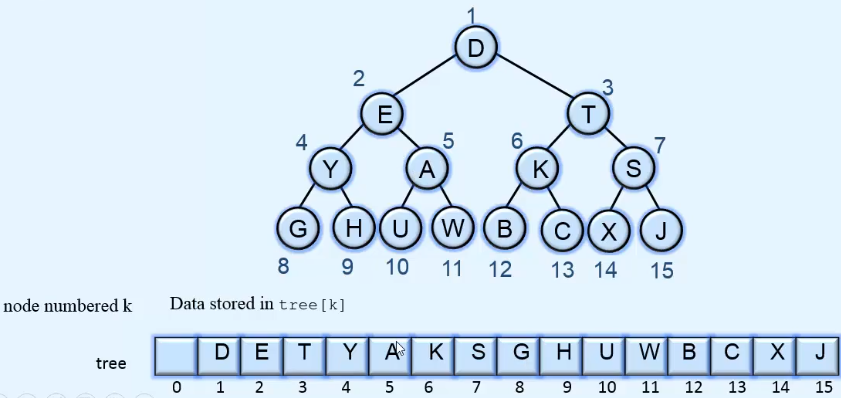




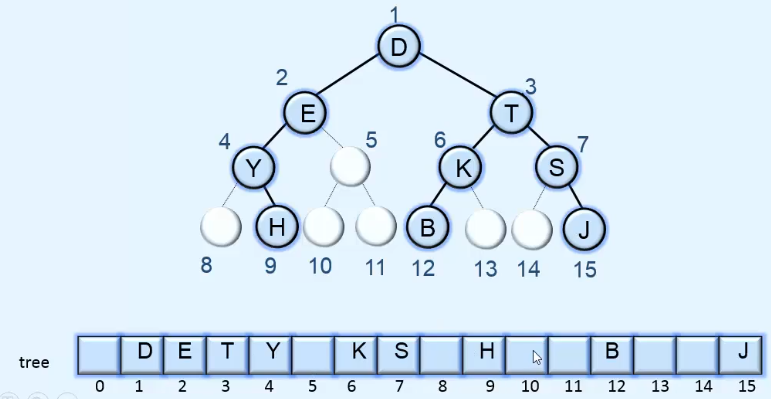

root is at 1, a node is at k then 2k is left child, right child is at 2k+1, parent would be at floor(k/2)

size of the list would be 2^h-1

# **2. Linked representation:**


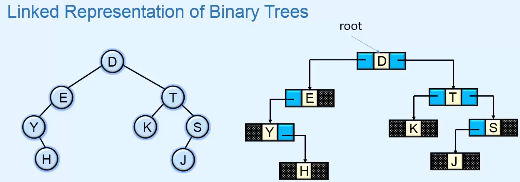

In [23]:
from collections import deque

class Node:
    def __init__(self,value):
        self.info = value
        self.lchild = None
        self.rchild = None

class BinaryTree:

    def __init__(self):
        self.root = None          

    def is_empty(selfi):
        return self.root == None

    def display(self):
        self._display(self.root,0)
        print()

    def _display(self,p,level):
        if p is None:
            return
        self._display(p.rchild, level+1)
        print()

        for i in range(level):
            print("     ", end='')
        print(p.info)
        self._display(p.lchild, level+1)       #

    def preorder(self):
        self._preorder(self.root)
        print()

    def _preorder(self,p):
        if p is None:
            return
        print(p.info, " ", end ='')
        self._preorder(p.lchild)
        self._preorder(p.rchild)

    def inorder(self):
        self._inorder(self.root)
        print()

    def _inorder(self, p):
        if p is None :
            return
        self._inorder(p.lchild)
        print(p.info, " ", end ='')
        self._inorder(p.rchild)

    def postorder(self):
        self._postorder(self.root)
        print()

    def _postorder(self, p):
        if p is None:
            return
        self._postorder(p.lchild)
        self._postorder(p.rchild)
        print(p.info, " ", end ='') 
    
    def level_order(self):
        if self.root is None:
            print("Tree is empty")
            return
        
        qu = deque()
        qu.append(self.root)
        
        while len(qu)!=0:
            p = qu.popleft()
            print(p.info + "  ",end='')
            if p.lchild is not None:
                qu.append(p.lchild)
            if p.rchild is not None:
                qu.append(p.rchild)
   
    def height(self):
        return self._height(self.root)
   
    def _height(self,p):
        if p is None:
            return 0
        
        hL = self._height(p.lchild)
        hR = self._height(p.rchild)
        
        if hL > hR:
            return 1 + hL
        else:
            return 1 + hR

    def create_tree(self):
        self.root = Node('P')
        self.root.lchild = Node('Q')
        self.root.rchild = Node('R')
        self.root.lchild.lchild = Node('A')
        self.root.lchild.rchild = Node('B')
        self.root.rchild.lchild = Node('X')
        # return self.root

In [32]:
class Node:
    def __init__(self, key):
        self.data = key
        self.left = None
        self.right = None


def printLevelOrder(root):
    h = height(root)
    for i in range(1, h+1):
        printCurrentLevel(root, i)
  
def printCurrentLevel(root , level):
    if root is None:
        return
    if level == 1:
        print(root.data,end=" ")
    elif level > 1 :
        printCurrentLevel(root.left , level-1)
        printCurrentLevel(root.right , level-1)


def height(node):
    if node is None:
        return 0
    else :
        # Compute the height of each subtree
        lheight = height(node.left)
        rheight = height(node.right)
 
        #Use the larger one
        if lheight > rheight :
            return lheight+1
        else:
            return rheight+1
 
# Driver program to test above function
root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)
 
print("Level order traversal of binary tree is ",printLevelOrder(root))
# printLevelOrder(root)

1 2 3 4 5 Level order traversal of binary tree is  None


## Traversal in BT

visiting the root node N,
traversing its left subtree L
traversing its right subtree R 

NRL NLR LNR LRN RNL RLN 6 total ways, 

if we say, visit left tree before right:

NLR (preorder)

LNR (Inorder)

LRN (postOrder)
3ways


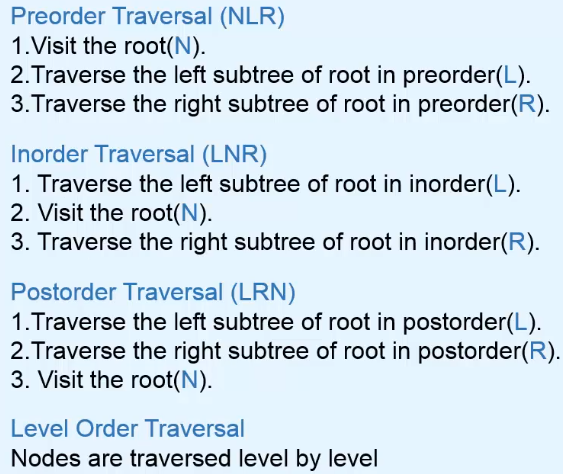


     R

          X

P

          B

     Q

          A

P  Q  A  B  R  X  


In [ ]:
print("preorder: ")
bt.preorder()
print()
print("postorder: ")
bt.postorder()
print()
print("Inorder: ")
bt.inorder()
print()
print("level order: ")
bt.level_order()

print()

print()
print("height of the tree is: ", bt.height())

preorder: 
P  Q  A  B  R  X  

postorder: 
A  B  Q  X  R  P  

Inorder: 
A  Q  B  P  X  R  

level order: 
P Q R A B X 

height of the tree is,  3


Preorder:
NLR

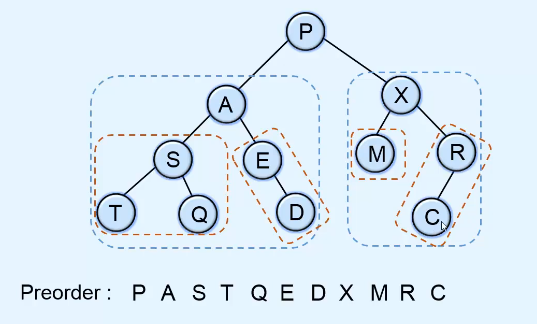

In [ ]:
#for code, we use a recursive method over root. 
def _preorder(self, p ):
    if p is None:
        return
    print(p.info, " ", end='')
    self._preorder(p.lchild)
    self._preorder(p.rchild)
    

Inorder: 
LNR

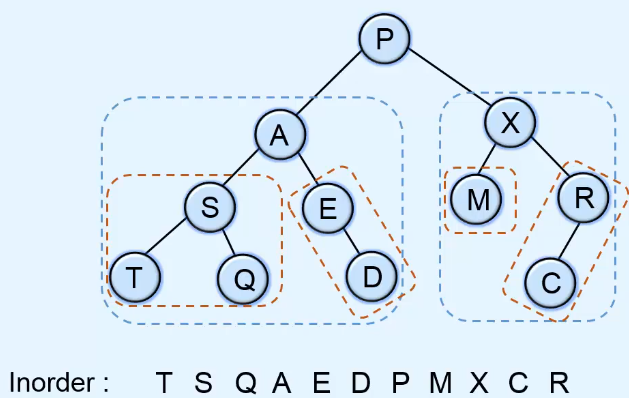

In [ ]:
def _inorder(self, p):
    if p is None :
        return
    self._inorder(p.lchild)
    print(p.info, " ", end ='')
    self._inorder(p.rchild)

Postorder:

LRN

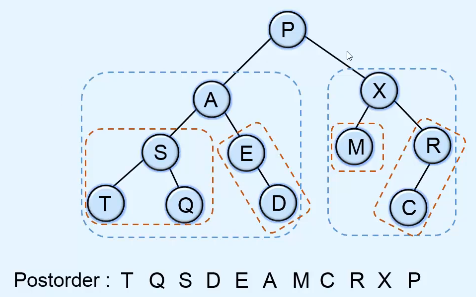

In [ ]:
def _postorder(self, p):
    if p is None:
        return
    self._postorder(p.lchild)
    self._postorder(p.rchild)
    print(p.info, " ", end ='') 

LevelOrder:
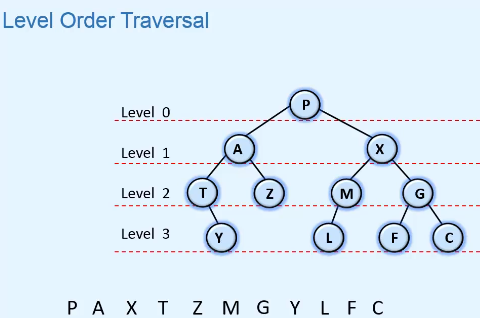

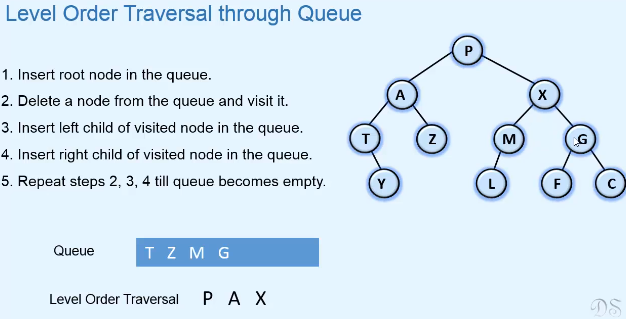

In [ ]:
#for this we need a QUEUE:
# 1. insert root node in the queue
# 2. delete a node from the queue and visit it.
# 3. insert left child of visited node in the queue
# 4. insert right child of visited node in the queue
# 5. repeat steps 2, 3, 4 till queue becomes empty


#from collections import deque

def level_order(self):
    if self.root is None:
        print("Tree is empty")
        return
    
    qu = deque()
    qu.append(self.root)
    
    while len(qu)!=0:
        p = qu.popleft()
        print(p.info + " ",end='')
        if p.lchild is not None:
            qu.append(p.lchild)
        if p.rchild is not None:
            qu.append(p.rchild)

## Height of a BT:
H(bt) = 1 + greater(hL, hR)
So, recursion.

In [ ]:
def _height(self, p):
    if p is None:
        return 0
    hL = self._height(p.lchild)
    hR = self._height(p.rchild)

    if hL>hR:
        return 1+hL
    else:
        return 1+hR


## Constructing a BT from Traversals

its not possible to create a unique bt if a inorder traversal is given, there might be many possible combinations of trees possible for that.
same for post and pre order.

We Need Either:
1. Inorder and Preorder
2. Inorder and Postorder


## **Inorder and Preorder:** 
> we get root node, as first node from preorder.

> look for root in inorder then, left to it is left subtree, and likewise.

> follow same procedure for all subtress.

Example: (inprogress) 


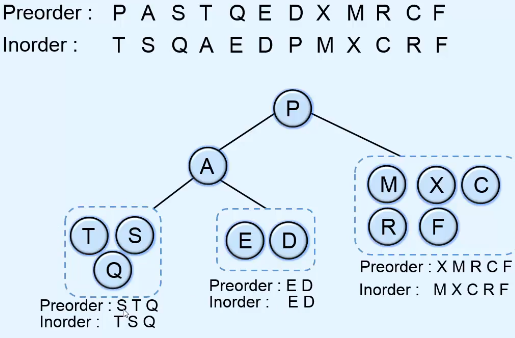


Another method: 

1. Insert the nodes from preorder traversal one by one in the tree, starting from the beginning
2. Mark the nodes which have been inserted
3. A node is inserted according to its position wrt to marked nodes in inorder
4. 


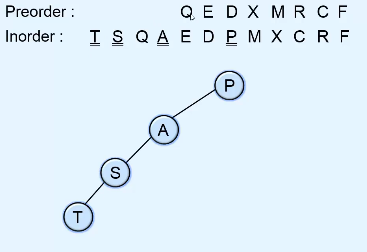

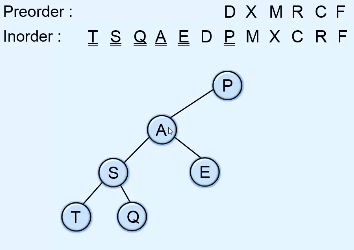

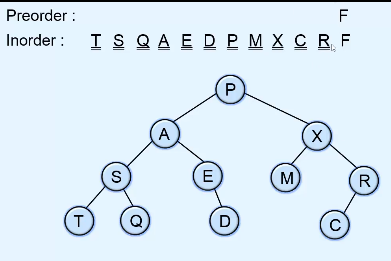

## **PostOrder and Inorder**
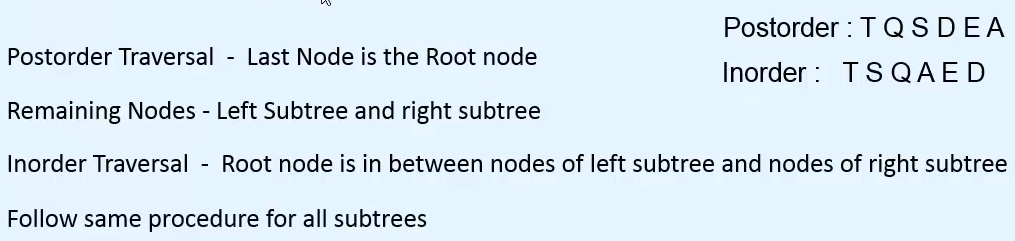

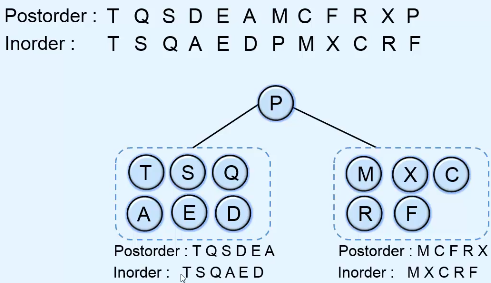

Another method: 

1. Insert the nodes from preorder traversal one by one in the tree, starting from the **END**
2. Mark the nodes which have been inserted
3. A node is inserted according to its position wrt to marked nodes in inorder